In [1]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import svm

reading CSV file and printing a co-relation heatmap to find most corelated features

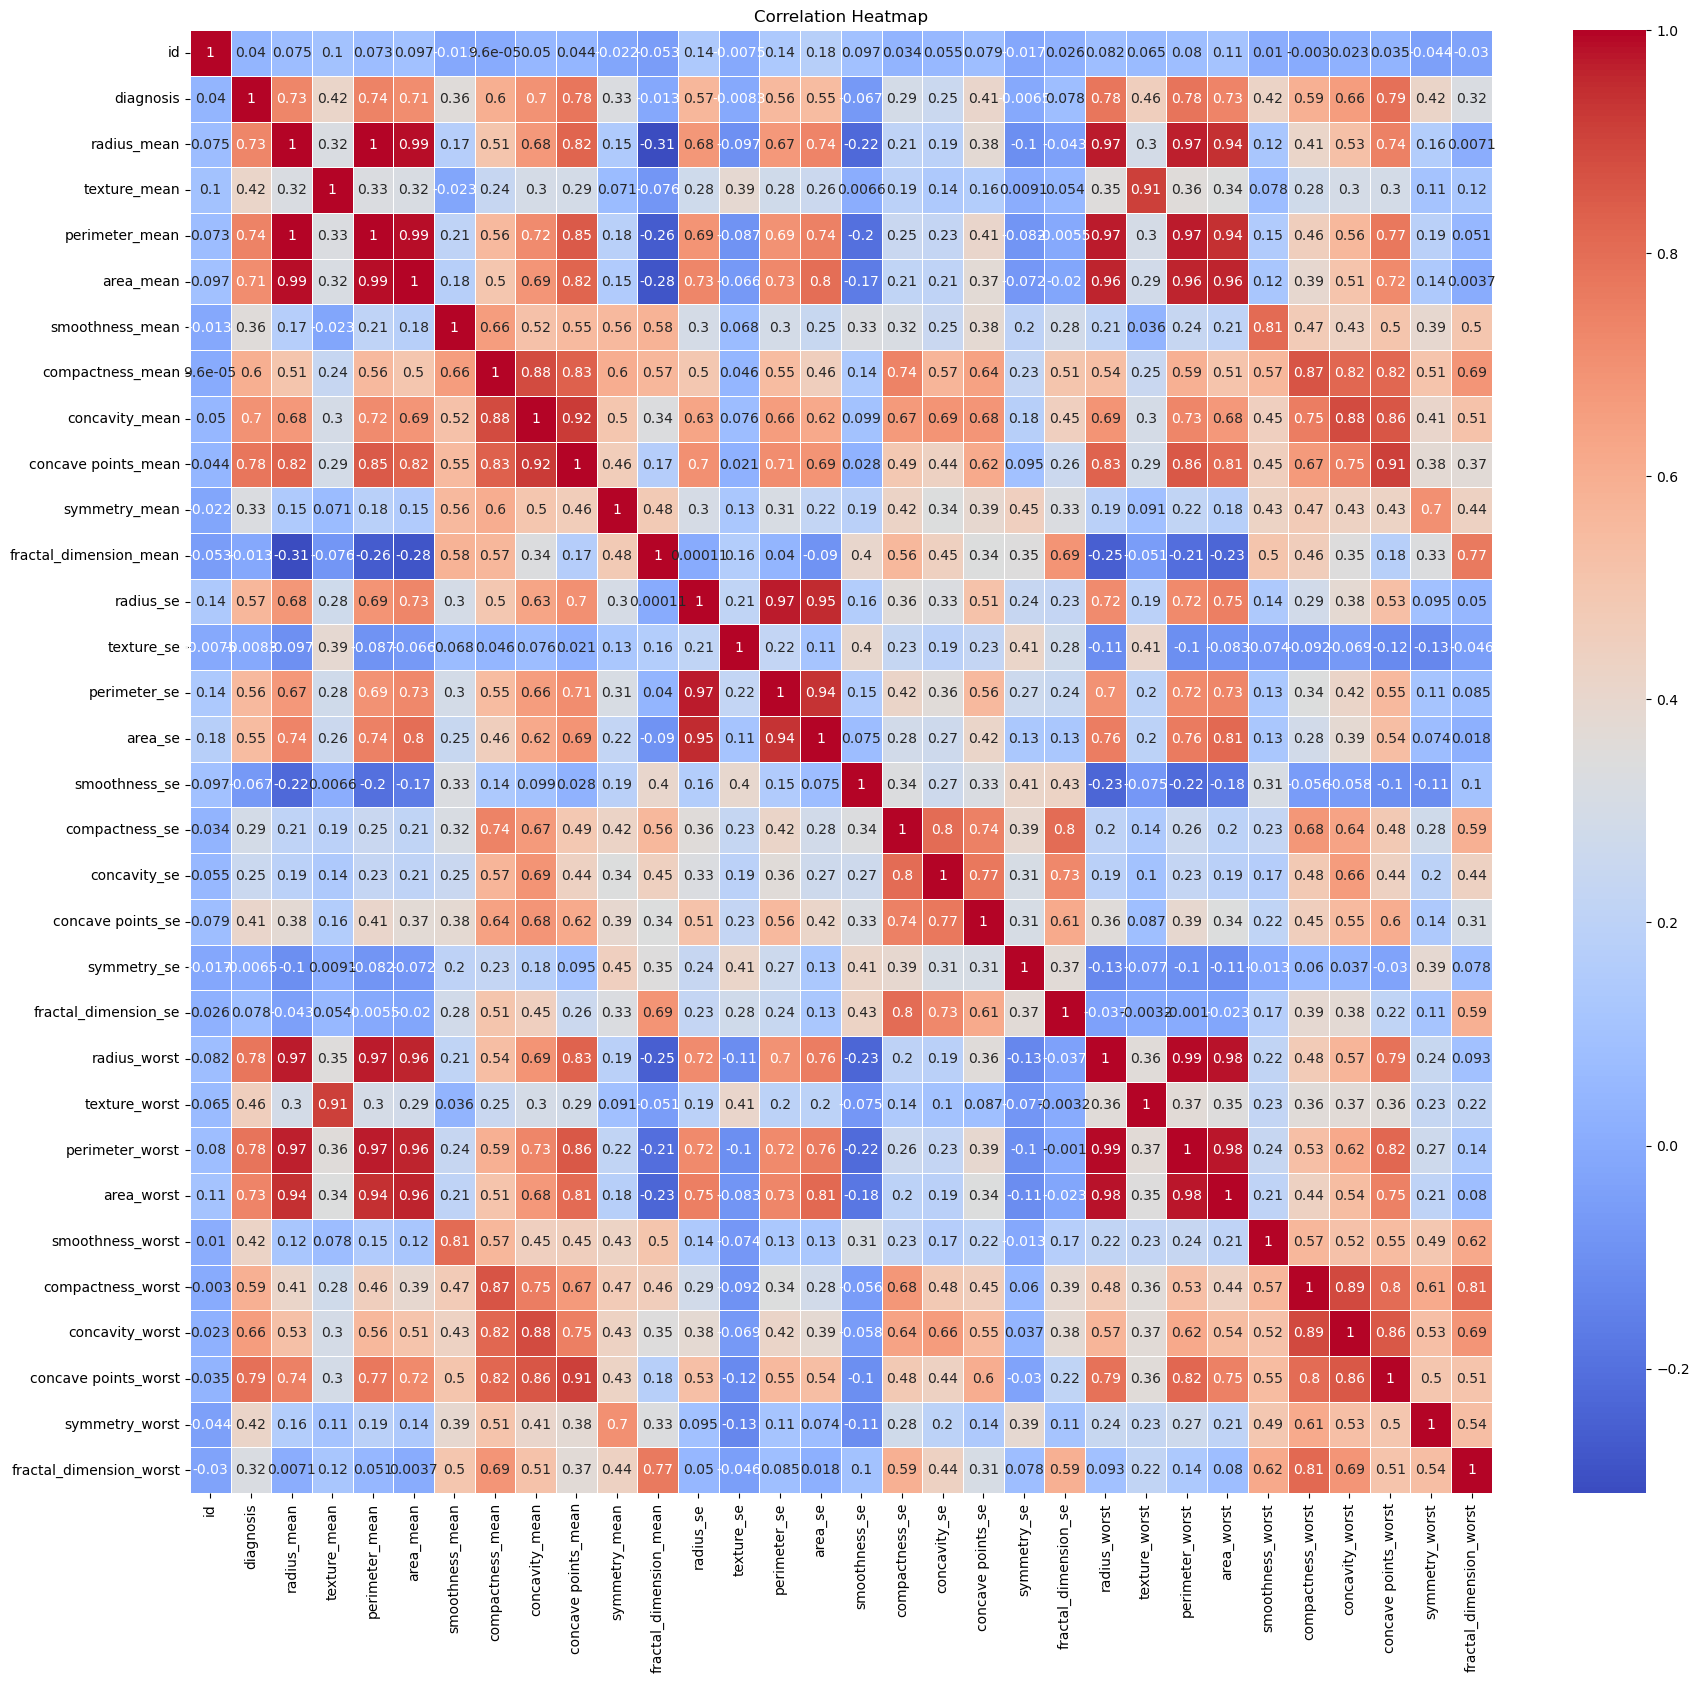

In [2]:
df = pandas.read_csv("breast-cancer.csv")

df['diagnosis'] = (df['diagnosis'] == 'M')
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(21,19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
                     

setting target and feature variables and splliting the train and test data

In [3]:
target_column = 'diagnosis'

selected_indices = [2, 4, 8, 9, 22, 24, 25, 29]  

selected_indices = [i for i in selected_indices if i < len(df.columns)]


top_features = df.columns[selected_indices]

print("Top correlated features:", top_features)


Top correlated features: Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


using randomforrest finding predictions

In [ ]:
X = df[top_features]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print('')
print('')

print(f'clasification report:\n{report}')

evaluating the predictions and making a Confusion Matrix and clasification report

In [5]:

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print('')
print('')

print(f'clasification report:\n{report}')

Confusion Matrix:
[[73  3]
 [ 3 35]]


clasification report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96        76
        True       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



using SVC finding predictions

In [6]:
clf= svm.SVC(kernel='linear').fit(X_test,y_pred)
y_pred2 = clf.predict(X_test)


evaluating the predictions and making a Confusion Matrix and clasification report

In [7]:
report1 = classification_report(y_test, y_pred2)
conf_matrix1 = confusion_matrix(y_test, y_pred2)

print(f'Confusion Matrix:\n{conf_matrix1}')
print('')
print('')

print(f'clasification report:\n{report1}')

Confusion Matrix:
[[71  5]
 [ 3 35]]


clasification report:
              precision    recall  f1-score   support

       False       0.96      0.93      0.95        76
        True       0.88      0.92      0.90        38

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



using LogisticRegression finding predictions

In [8]:
clf2 = LogisticRegression(max_iter=1000)

clf2.fit(X_train, y_train)
y_pred3 = clf2.predict(X_test)

evaluating the predictions and making a Confusion Matrix and clasification report

In [9]:
report2 = classification_report(y_test, y_pred3)
conf_matrix2 = confusion_matrix(y_test, y_pred3)

print(f'Confusion Matrix:\n{conf_matrix2}')
print('')
print('')

print(f'clasification report:\n{report2}')

Confusion Matrix:
[[71  5]
 [ 2 36]]


clasification report:
              precision    recall  f1-score   support

       False       0.97      0.93      0.95        76
        True       0.88      0.95      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

